# Finance & Analytics Club

## ATR (Average True Range) & Bollinger Bands

Both are volatility based indicators.

Bollinger Bands comprises of 2 lines plotted n (typically 2) standard deviation away from an m (typically 20) period simple moving average line. The bands widen during increased volatility period and shrink during decreased volatility period.

The ATR takes in account the market movement each day in either direction and averaging them out. It focuses on total price movement and conveys how wildly the market is swinging as it moves.

They are often used in conjunction since they are complimentary.

Import necessary libraries

In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt

Download historical data for required stocks


In [2]:
ticker = "MSFT"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(1825),dt.date.today())
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-29,45.230000,44.360001,45.040001,44.369999,34081700.0,40.155910
2015-06-30,44.720001,43.939999,44.709999,44.150002,35945400.0,39.956821
2015-07-01,45.230000,44.099998,44.459999,44.450001,28343900.0,40.228317
2015-07-02,44.750000,44.060001,44.480000,44.400002,21752000.0,40.183064
2015-07-06,44.480000,43.950001,43.959999,44.389999,23034000.0,40.174019
...,...,...,...,...,...,...
2020-06-19,199.289993,194.369995,198.589996,195.149994,44441100.0,195.149994
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,200.570007
2020-06-23,203.949997,201.429993,202.089996,201.910004,30917400.0,201.910004


### Function to calculate True Range and Average True Range

In [3]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1)) # (high today - previous day close), therefore shift 1
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1)) # (low today - previous day close), therefore shift 1
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()  if you wanna take exponential mean instead of rolling mean
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [4]:
df = ATR(ohlcv, 20)
df = df.dropna(axis = 0)
df

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2015-07-28,45.639999,44.790001,45.580002,45.340000,34328900.0,41.033791,4.597164,4.740565
2015-07-29,46.779999,45.259998,45.400002,46.290001,40945900.0,41.893566,5.746208,4.799671
2015-07-30,47.400002,45.930000,46.259998,46.880001,39777900.0,42.427528,5.506435,4.811333
2015-07-31,47.369999,46.500000,47.290001,46.700001,31201500.0,42.264629,4.942471,4.832373
2015-08-03,47.000000,46.450001,46.980000,46.810001,24125900.0,42.364178,4.735371,4.854295
...,...,...,...,...,...,...,...,...
2020-06-19,199.289993,194.369995,198.589996,195.149994,44441100.0,195.149994,4.919998,4.729500
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,200.570007,5.610001,4.913999
2020-06-23,203.949997,201.429993,202.089996,201.910004,30917400.0,201.910004,3.379990,4.812999


### Plotting TR and ATR

/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


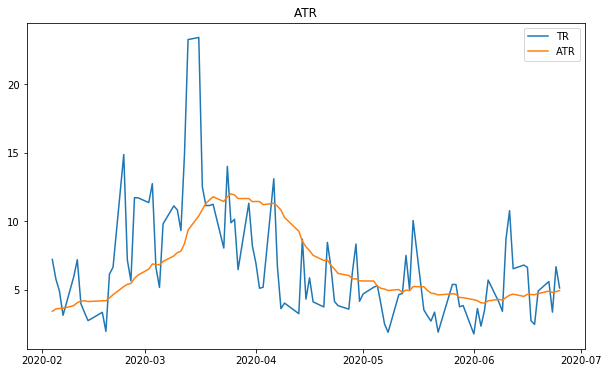

In [5]:
plt.figure(figsize = (10,6))
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('ATR')
plt.legend(('TR','ATR'),loc='best')

plt.show()

### Function to calculate Bollinger Band

In [6]:
def BollBnd(DF,n):
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df

In [7]:
df = BollBnd(ohlcv, 20)
df

,High,Low,Open,Close,Volume,Adj Close,MA,BB_up,BB_dn,BB_width
Date,,,,,,,,,,
2015-07-27,46.009998,45.250000,45.939999,45.349998,39701400.0,41.042835,41.032435,42.813318,39.251553,3.561765
2015-07-28,45.639999,44.790001,45.580002,45.340000,34328900.0,41.033791,41.076329,42.811315,39.341343,3.469972
2015-07-29,46.779999,45.259998,45.400002,46.290001,40945900.0,41.893566,41.173166,42.863013,39.483319,3.379694
2015-07-30,47.400002,45.930000,46.259998,46.880001,39777900.0,42.427528,41.283127,42.998748,39.567506,3.431241
2015-07-31,47.369999,46.500000,47.290001,46.700001,31201500.0,42.264629,41.387205,43.075597,39.698814,3.376784
...,...,...,...,...,...,...,...,...,...,...
2020-06-19,199.289993,194.369995,198.589996,195.149994,44441100.0,195.149994,187.599501,197.681123,177.517879,20.163243
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,200.570007,188.452502,199.811668,177.093336,22.718332
2020-06-23,203.949997,201.429993,202.089996,201.910004,30917400.0,201.910004,189.469501,201.783746,177.155257,24.628489


### Plotting Bollinger Bands

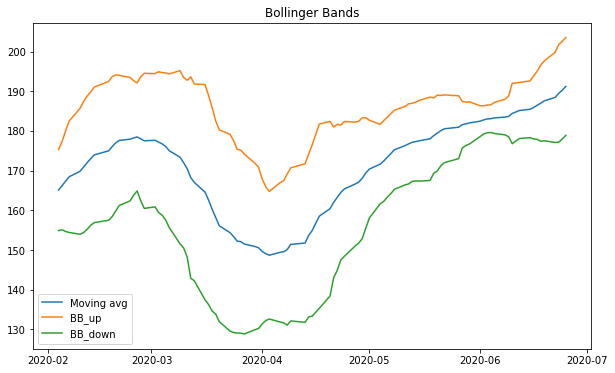

In [8]:
plt.figure(figsize = (10,6))
plt.plot(df.iloc[-100:,[-4,-3,-2]])
plt.title('Bollinger Bands')
plt.legend(('Moving avg','BB_up','BB_down'),loc='best')

plt.show()